
# Bayesian Network Model for Credit Worthiness 

This script builds a Bayesian Network model to predict credit worthiness based on several factors 
like income, assets, debt ratios, and payment history. 



[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


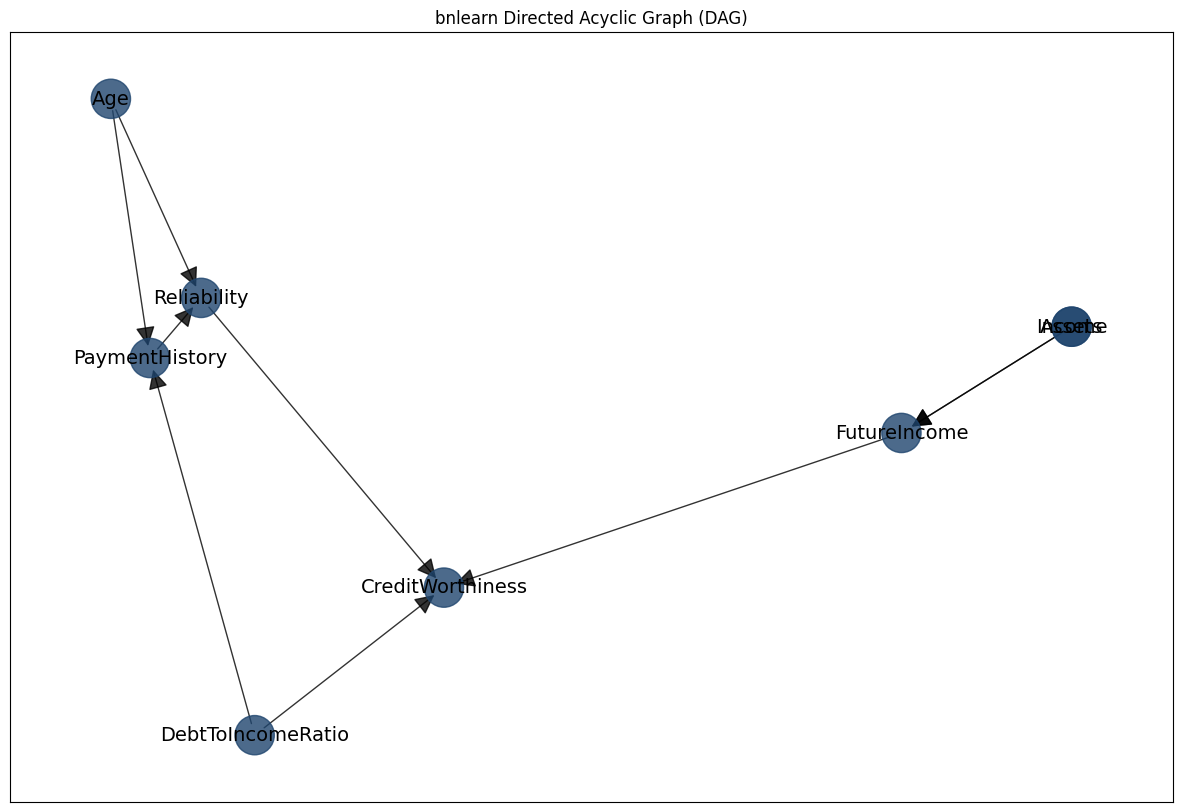

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'PaymentHistory': array([-0.50941915,  0.11031963]),
  'Reliability': array([-0.43985395,  0.28725419]),
  'CreditWorthiness': array([-0.11076964, -0.56557964]),
  'Age': array([-0.56226778,  0.87328955]),
  'DebtToIncomeRatio': array([-0.36734653, -1.        ]),
  'Income': array([0.74011895, 0.20251795]),
  'Assets': array([0.74011895, 0.20251795]),
  'FutureIncome': array([ 0.50941915, -0.11031963])},
 'G': <networkx.classes.digraph.DiGraph at 0x1a1e8d19b50>,
 'node_properties': {'PaymentHistory': {'node_color': '#1f456e',
   'node_size': 800},
  'Reliability': {'node_color': '#1f456e', 'node_size': 800},
  'Age': {'node_color': '#1f456e', 'node_size': 800},
  'DebtToIncomeRatio': {'node_color': '#1f456e', 'node_size': 800},
  'Income': {'node_color': '#1f456e', 'node_size': 800},
  'Assets': {'node_color': '#1f456e', 'node_size': 800},
  'FutureIncome': {'node_color': '#1f456e', 'node_

In [52]:
# Import necessary libraries
import pandas as pd
import bnlearn
from pgmpy.factors.discrete import TabularCPD


# Define nodes (variables) for the Bayesian Network
nodes = ['Income', 'PaymentHistory', 'Age', 'DebtToIncomeRatio', 'Assets', 'Reliability', 'FutureIncome', 'CreditWorthiness']

# Define edges (relationships) based on domain knowledge
edges = [
    ('PaymentHistory', 'Reliability'),
    ('Age', 'Reliability'),
    ('Age', 'PaymentHistory'),
    ('DebtToIncomeRatio', 'PaymentHistory'),
    ('Income', 'Assets'),
    ('Assets', 'FutureIncome'),
    ('Income', 'FutureIncome'),
    ('Reliability', 'CreditWorthiness'),
    ('FutureIncome', 'CreditWorthiness'),
    ('DebtToIncomeRatio', 'CreditWorthiness')
]

# Create the Bayesian Network structure (DAG)
DAG = bnlearn.make_DAG(edges)

bnlearn.plot(DAG)

### Run the following code for more interactive representation

In [53]:
# bnlearn.plot(DAG, interactive=True, params_interactive = {'height':'800px', 'width':'70%', 'layout':None, 'bgcolor':'#0d0d0d'})


## Bayesian Network: Conditional Probability Distributions (CPDs)

In this Bayesian network model, we define Conditional Probability Distributions (CPDs) to represent the relationships between various parameters that influence **creditworthiness**. The CPDs capture the likelihood of various states for each node based on its dependencies.

### Parameter Levels

We define several parameters, each with a set of discrete levels. These are used to model different aspects of a client's financial status and their relationship with creditworthiness.

#### Parameters:

- **Income**  
  Levels:  
  0: high  
  1: medium  
  2: low  

- **Assets**  
  Levels:  
  0: high  
  1: medium  
  2: low  

- **Ratio of debts to income**  
  Levels:  
  0: high  
  1: low  

- **Payment history**  
  Levels:  
  0: excellent  
  1: acceptable  
  2: unacceptable  

- **Age**  
  Levels:  
  0: 16-21  
  1: 22-64  
  2: over 65  

- **Client reliability**  
  Levels:  
  0: reliable  
  1: unreliable  

- **Future income**  
  Levels:  
  0: promising  
  1: not promising  

- **Ratio of debts to future income**  
  Levels:  
  0: low  
  1: high  

___ 

### Parameter Dependencies

In this model, we also capture how different parameters influence one another. These dependencies help structure the Bayesian Network and inform the probability distributions of the network's nodes.

#### Key Dependencies:

1. **Payment History**  
   - The better the payment history, the more likely the person is to be reliable.

2. **Age and Reliability**  
   - The older the person, the more likely they are to be reliable.
   - Older people tend to have excellent payment histories.

3. **Debts to Income Ratio and Payment History**  
   - People with a high ratio of debts to income rarely have a good payment history.

4. **Income and Assets**  
   - The higher the income, the more likely the person has significant assets.

5. **Income, Assets, and Future Income**  
   - The greater the person's assets and income, the more likely they will have high future income.

6. **Reliability and Creditworthiness**  
   - More reliable people usually have higher creditworthiness.

7. **Future Income, Debts to Income Ratio, and Creditworthiness**  
   - People with promising future income and those with a low ratio of debts to income tend to have higher creditworthiness than others.


In [ ]:
# CPD for 'Income' with three levels: high, medium, low
cpd_income = TabularCPD(variable='Income', variable_card=3, values=[[0.5], [0.35], [0.15]])

# CPD for 'PaymentHistory', dependent on 'Age' and 'DebtToIncomeRatio'
cpd_payment_history = TabularCPD(
    variable='PaymentHistory', variable_card=3,
    values=[[0.2, 0.25, 0.05, 0.25, 0.01, 0.1],
            [0.35, 0.35, 0.15, 0.3, 0.19, 0.3],
            [0.45, 0.4, 0.8, 0.45, 0.8, 0.6]],
    evidence=['Age', 'DebtToIncomeRatio'], evidence_card=[3, 2]
)

# CPD for 'Age' with three levels: 16-21, 22-64, over 65
cpd_age = TabularCPD(variable='Age', variable_card=3, values=[[0.2], [0.3], [0.5]])

# CPD for 'DebtToIncomeRatio' with two levels: high, low
cpd_debt_to_income_ratio = TabularCPD(variable='DebtToIncomeRatio', variable_card=2, values=[[0.7], [0.3]])

# CPD for 'Assets', dependent on 'Income'
cpd_assets = TabularCPD(
    variable='Assets', variable_card=3,
    values=[[0.7, 0.8, 0.1], [0.2, 0.15, 0.05], [0.1, 0.05, 0.85]],
    evidence=['Income'], evidence_card=[3]
)

# CPD for 'Reliability', dependent on 'PaymentHistory' and 'Age'
cpd_reliability = TabularCPD(
    variable='Reliability', variable_card=2,
    values=[[0.95, 0.9, 0.85, 0.75, 0.7, 0.6, 0.65, 0.6, 0.55],
            [0.05, 0.1, 0.15, 0.25, 0.3, 0.4, 0.35, 0.4, 0.45]],
    evidence=['PaymentHistory', 'Age'], evidence_card=[3, 3]
)

# CPD for 'FutureIncome', dependent on 'Income' and 'Assets'
cpd_future_income = TabularCPD(
    variable='FutureIncome', variable_card=2,
    values=[[0.65, 0.6, 0.55, 0.75, 0.7, 0.6, 0.95, 0.9, 0.85],
            [0.35, 0.4, 0.45, 0.25, 0.3, 0.4, 0.05, 0.1, 0.15]],
    evidence=['Income', 'Assets'], evidence_card=[3, 3]
)

# CPD for 'CreditWorthiness', dependent on 'Reliability', 'FutureIncome', and 'DebtToIncomeRatio'
cpd_credit_worthiness = TabularCPD(
    variable='CreditWorthiness', variable_card=2,
    values=[[0.99, 0.8, 0.8, 0.4, 0.8, 0.4, 0.4, 0.01], 
            [0.01, 0.2, 0.2, 0.6, 0.2, 0.6, 0.6, 0.99]],
    evidence=['Reliability', 'FutureIncome', 'DebtToIncomeRatio'], evidence_card=[2, 2, 2]
)

# Finalize the DAG with CPDs
DAG = bnlearn.make_DAG(DAG, CPD=[cpd_income, cpd_payment_history, cpd_age, cpd_debt_to_income_ratio, cpd_assets, cpd_reliability, cpd_future_income, cpd_credit_worthiness])


In [61]:
# Example 1: A 20-year-old with an excellent payment history
print(bnlearn.inference.fit(DAG, variables=['CreditWorthiness'], evidence={'Age': 2, 'PaymentHistory': 0}))

# Example 2: High income, high assets, and low debt-to-income 
print(bnlearn.inference.fit(DAG, variables=['CreditWorthiness'], evidence={'Income': 0, 'Assets': 0, 'DebtToIncomeRatio': 0}))

# Example 3: 70-year-old with medium assets and low income
print(bnlearn.inference.fit(DAG, variables=['CreditWorthiness'], evidence={'Age': 0, 'Assets': 1, 'Income': 0}))

# Example 4: Promising future income and low debt-to-income ratio
print(bnlearn.inference.fit(DAG, variables=['CreditWorthiness'], evidence={'FutureIncome': 0, 'DebtToIncomeRatio': 0}))

# Example 5: 22-year-old with low income, low assets, and excellent payment history
print(bnlearn.inference.fit(DAG, variables=['CreditWorthiness'], evidence={'Age': 2, 'Assets': 0, 'PaymentHistory': 0}))

# Example 6: 40-year-old with high income, acceptable payment history
print(bnlearn.inference.fit(DAG, variables=['CreditWorthiness'], evidence={'Age': 0,'PaymentHistory': 0, 'Income': 0}))


[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+--------------------+----------+
|    |   CreditWorthiness |        p |
+====+====================+==========+
|  0 |                  0 | 0.672994 |
+----+--------------------+----------+
|  1 |                  1 | 0.327006 |
+----+--------------------+----------+
+---------------------+-------------------------+
| CreditWorthiness    |   phi(CreditWorthiness) |
+=====================+=========================+
| CreditWorthiness(0) |                  0.6730 |
+---------------------+-------------------------+
| CreditWorthiness(1) |                  0.3270 |
+---------------------+-------------------------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+--------------------+----------+
|    |   CreditWorthiness |        p |
+====+====================+